## Importing libraries and functions

In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras import layers, models, optimizers
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D,Conv2D 
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,TensorBoard
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, ParameterGrid
from collections import Counter


## Importing data and analysing it

### Importing the data

In [2]:
train_data = pd.read_csv("fashion-mnist_train.csv")

test_data = pd.read_csv("fashion-mnist_test.csv")

### Making sure that the data has no null values

In [3]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.isnull().sum()
# No null values

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### Train test split

In [5]:
# X forms the training images, and y forms the training labels
x_train = np.array(train_data.iloc[:, 1:]) # Changed it to array as it is favorable to use it rather than pandas DF
y_train = (np.array(train_data.iloc[:, 0]))
classes = np.unique(train_data.iloc[:, 0])

In [6]:
# Doing the same for the test data
# X_test forms the test images, and y_test forms the test labels
x_test = np.array(test_data.iloc[:, 1:])
y_test =(np.array(test_data.iloc[:, 0]))

## Checking the distribution of the classes

### Converting the labels from numerical values to actual categorical values

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

numeric_labels = [0,1,2,3,4,5,6,7,8,9]

# Convert numeric labels to class names
class_labels = [class_names[label] for label in numeric_labels]


### Checking for the distribution of the class count along the dataset

In [8]:
# Calculate the class distribution using Counter
class_counts = Counter(y_train)

# Sort the class distribution by class index
class_counts = dict(sorted(class_counts.items()))

# Print the sorted class distribution
print("Class Distribution:")
for class_index, count in class_counts.items():
    class_name = class_names[class_index]
    print(f"{class_name}: {count} samples")

Class Distribution:
T-shirt/top: 6000 samples
Trouser: 6000 samples
Pullover: 6000 samples
Dress: 6000 samples
Coat: 6000 samples
Sandal: 6000 samples
Shirt: 6000 samples
Sneaker: 6000 samples
Bag: 6000 samples
Ankle boot: 6000 samples


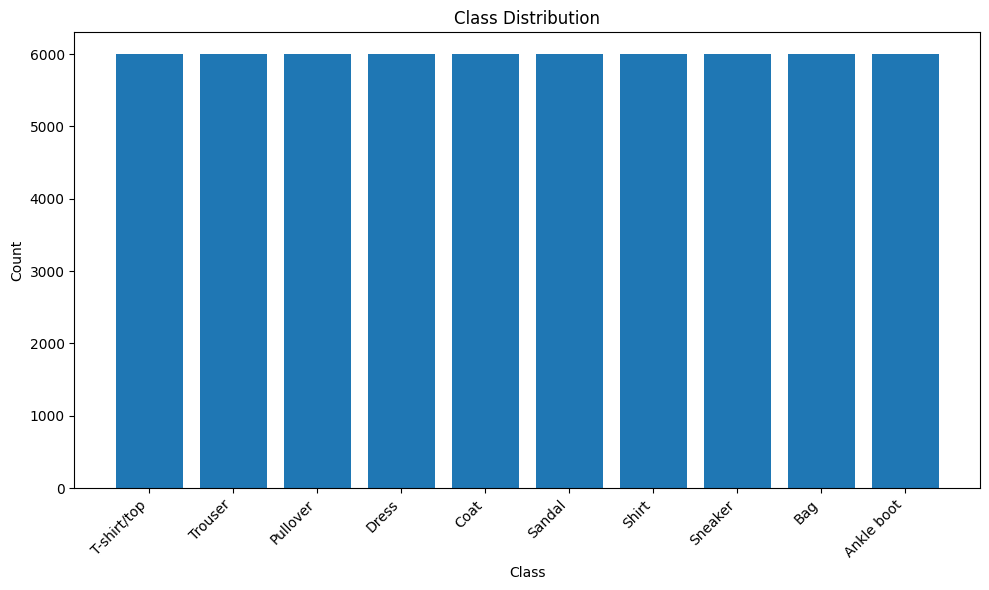

In [9]:
# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, count)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# since all the classes have the same number of samples we don't need to use any sampler

## Processing Data

### Checking the shape of the data

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Normalizing the images, so that the image pixels range from 0 to 1

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
(pd.DataFrame(x_train)).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


### Checking how does the image look like

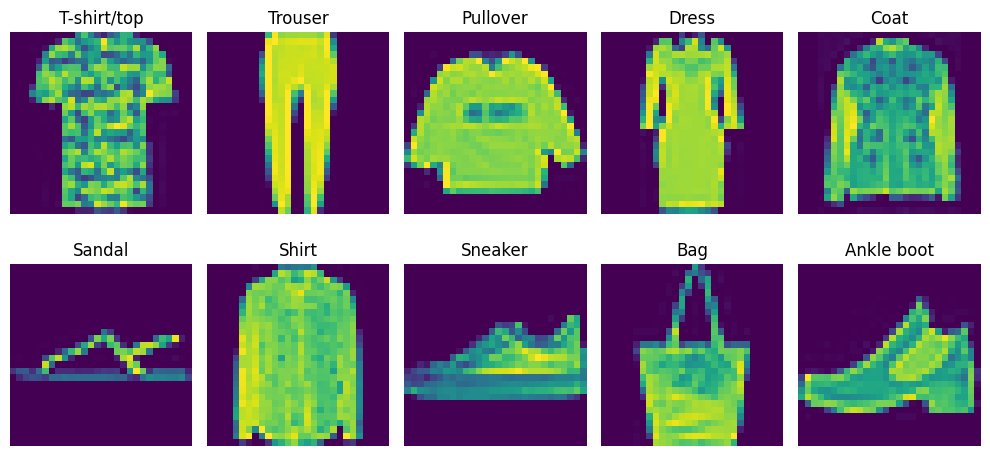

In [13]:
# Dictionary to store the index of the first image for each class
class_indices = {}

# Find the index of the first image for each class
for i in range(10):
    class_indices[i] = np.where(y_train == i)[0][0]

# Plot one sample image from each class
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[class_indices[i]].reshape((28, 28)))
    plt.title(class_names[i])
    plt.axis('off')  # To remove the numerical axis around each picture
plt.tight_layout()
plt.show()


## Feedforward Neural Network Implementation

### Building the layers of the network

In [14]:
# Define parameters
input_shape = (28, 28)  # Fashion-MNIST images are 28x28 pixels
num_classes = 10  # There are 10 classes in Fashion-MNIST
neurons_per_layer = 128  # Number of neurons in each hidden layer
dropout_rate = 0.5  # Dropout rate for regularization. In order to prevent any overfitting

# Create the flexible neural network
model = models.Sequential()

# Add input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

# Add hidden layers with dropout
model.add(Dense(neurons_per_layer, activation='relu'))
model.add(Dropout(dropout_rate))  # Dropout layer for regularization
model.add(Dense(neurons_per_layer//2, activation='relu'))  # Use floor division to ensure integer output
model.add(Dropout(dropout_rate)) 

# Add output layer
model.add(Dense(num_classes, activation='softmax'))

# Print model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

## backpropagation algorithm with support for mulitple optimizers

In [15]:
# Define batch size and number of epochs in order to maintain a flexible code
batch_size = 64
epochs = 10

#define the compiling function 
def compile_model(optimizer):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x_train = x_train.reshape(-1, 28, 28, 1)
# Train the model with different optimizers and return the training history
def compile_and_train(optimizer):
    compile_model(optimizer)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    return history

# Train the model with different optimizers and collect the training history
optimizers_list = ['SGD', 'momentum', 'nesterov', 'rmsprop', 'adam']

# Define lists to store accuracy values for each optimizer
train_accuracy = []
val_accuracy = []

# Define a dictionary to store training history for each optimizer
history_per_optimizer = {}

# Iterate over each optimizer
for opt_name in optimizers_list:
    print(f"\nTraining with {opt_name} optimizer:")
    if opt_name == 'SGD':
        history_per_optimizer[opt_name] = compile_and_train(optimizers.SGD())
    elif opt_name == 'momentum':
        history_per_optimizer[opt_name] = compile_and_train(optimizers.SGD(momentum=0.9))
    elif opt_name == 'nesterov':
        history_per_optimizer[opt_name] = compile_and_train(optimizers.SGD(momentum=0.9, nesterov=True))
    elif opt_name == 'rmsprop':
        history_per_optimizer[opt_name] = compile_and_train(optimizers.RMSprop())
    elif opt_name == 'adam':
        history_per_optimizer[opt_name] = compile_and_train(optimizers.Adam())

    # Extract accuracy values from training history
    history = history_per_optimizer[opt_name]
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    
    # Append accuracy values to the lists
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)

    # Print the accuracy values
    print(f'Training Accuracy for {opt_name}: {train_acc:.4f}')
    print(f'Validation Accuracy for {opt_name}: {val_acc:.4f}')


Training with SGD optimizer:
Epoch 1/10


750/750 [==============================] - 6s 7ms/step - loss: 1.8289 - accuracy: 0.3178 - val_loss: 1.0489 - val_accuracy: 0.6310
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 1.1615 - accuracy: 0.5590 - val_loss: 0.8037 - val_accuracy: 0.7017
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.9471 - accuracy: 0.6451 - val_loss: 0.7119 - val_accuracy: 0.7270
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.8428 - accuracy: 0.6811 - val_loss: 0.6725 - val_accuracy: 0.7270
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.7839 - accuracy: 0.7028 - val_loss: 0.6246 - val_accuracy: 0.7580
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.7438 - accuracy: 0.7219 - val_loss: 0.5978 - val_accuracy: 0.7698
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.7064 - accuracy: 0.7362 - val_loss: 0.57

In [16]:
highest_train_accuracy = max(train_accuracy)
print("Highest Train Accuracy:", highest_train_accuracy)

highest_val_accuracy = max(val_accuracy)
print("Highest Validation Accuracy:", highest_val_accuracy)


Highest Train Accuracy: 0.940541684627533
Highest Validation Accuracy: 0.909416675567627


#### From the results Adam produced the best accuracy results with (Training Accuracy for adam: 0.9371 and Validation Accuracy for adam: 0.9021 and loss Accuracy for adam: 0.1773)

## Hypertuning

##### Since Adam optimizer gave me the best accuracy we will use it with different hyperparameters


#### Import the dataset to ensure it's validity

In [17]:
hp_train_data = pd.read_csv("fashion-mnist_train.csv")

#### Separating the data to target and features while changing it to an array

In [18]:
# X forms the training images, and y forms the training labels
hp_x_train = np.array(hp_train_data.iloc[:, 1:]) # Changed it to array as it is favorable to use it rather than pandas DF
hp_y_train = (np.array(hp_train_data.iloc[:, 0]))
hp_classes = np.unique(hp_train_data.iloc[:, 0])

#### Train test split

In [19]:
# split the training data into train and validate arrays

hpx_train, hpx_val, hpy_train, hpy_val = train_test_split(hp_x_train, hp_y_train,test_size=0.2, random_state=42)

#### Normalizing the features

In [20]:
hpx_train = hpx_train/255

hpx_val = hpx_val/255

#### Flattening input images

In [21]:
# Flatten input images
hpx_train = hpx_train.reshape((-1, 28 * 28))
hpx_val = hpx_val.reshape((-1, 28 * 28))


In [22]:
hpx_train.shape

(48000, 784)

#### Identifying the hyperparameters 

In [23]:
# Define grid of hyperparameters
param_grid = {
    'epochs': [5, 10],
    'hidden_layers': [3, 4, 5],
    'layer_size': [32, 64, 128],
    'weight_decay': [0, 0.0005, 0.5],
    'learning_rate': [1e-3, 1e-4],
    'batch_size': [16, 32, 64],
    'activation': ['sigmoid', 'tanh', 'relu']
}

#### creating the function that will be used 

In [24]:
# Importing lr regularizer
from keras.regularizers import l2

# Define function to create and train the model
def create_and_train_model(params, hpx_train, hpy_train, hpx_val, hpy_val):
    model = Sequential()
    model.add(Dense(params['layer_size'], activation=params['activation'], input_shape=(784,)))
    for _ in range(params['hidden_layers'] - 1):
        model.add(Dense(params['layer_size'], activation=params['activation']))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(hpx_train, hpy_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0, validation_data=(hpx_val, hpy_val))
    
    val_loss, val_accuracy = model.evaluate(hpx_val, hpy_val, verbose=0)
    
    print(f"Params: {params} - Validation Accuracy: {val_accuracy:.4f}")

    return val_accuracy

#### Using a small part of the datasets to get the results in a quick matter

In [25]:
# Shuffle the training and validation sets
shuffled_indices_train = np.random.permutation(len(hpx_train))
shuffled_indices_val = np.random.permutation(len(hpx_val))

# Select 5000 rows from the shuffled indices
selected_indices_train = shuffled_indices_train[:5000]
selected_indices_val = shuffled_indices_val[:5000]

# Create the smaller training and validation sets
smol_hpx_train = hpx_train[selected_indices_train]
smol_hpy_train = hpy_train[selected_indices_train]
smol_hpx_val = hpx_val[selected_indices_val]
smol_hpy_val = hpy_val[selected_indices_val]

### The grid Search

In [26]:
# Importing lr regularizer
from keras.regularizers import l2

# Perform grid search

# Initialize variables to store the best parameters and accuracy
best_params = None
best_accuracy = 0.0

# Iterate through each combination of hyperparameters in the grid
for params in ParameterGrid(param_grid):

    # Train the model and obtain validation accuracy using the create_and_train_model function
    accuracy = create_and_train_model(params, smol_hpx_train, smol_hpy_train, smol_hpx_val, smol_hpy_val)

    # Update the best parameters and accuracy if the current model performs better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

    # Print the best parameters and accuracy found during grid search
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Params: {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 5, 'hidden_layers': 3, 'layer_size': 32, 'learning_rate': 0.001, 'weight_decay': 0} - Validation Accuracy: 0.7352
Params: {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 5, 'hidden_layers': 3, 'layer_size': 32, 'learning_rate': 0.001, 'weight_decay': 0.0005} - Validation Accuracy: 0.7122
Params: {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 5, 'hidden_layers': 3, 'layer_size': 32, 'learning_rate': 0.001, 'weight_decay': 0.5} - Validation Accuracy: 0.6940
Params: {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 5, 'hidden_layers': 3, 'layer_size': 32, 'learning_rate': 0.0001, 'weight_decay': 0} - Validation Accuracy: 0.4638
Params: {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 5, 'hidden_layers': 3, 'layer_size': 32, 'learning_rate': 0.0001, 'weight_decay': 0.0005} - Validation Accuracy: 0.5350
Params: {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 5, 'hidden_layers': 3, 'layer_size': 32, 'le

### The implementation of the best parameters

In [27]:
# Define batch size and number of epochs
batch_size = 32
epochs = 10

# Define model creation function with best parameters
def create_best_model():
    model = Sequential()
    model.add(Dense(best_params['layer_size'], activation=best_params['activation'], input_shape=(784,)))
    for _ in range(best_params['hidden_layers'] - 1):
        model.add(Dense(best_params['layer_size'], activation=best_params['activation']))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=best_params['learning_rate'], weight_decay=best_params['weight_decay'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the best model
best_model = create_best_model()

# Train the model
history = best_model.fit(hpx_train, hpy_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(hpx_val, hpy_val))

# Print the training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.5031 - accuracy: 0.8194 - val_loss: 0.4095 - val_accuracy: 0.8502
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3878 - accuracy: 0.8587 - val_loss: 0.3555 - val_accuracy: 0.8725
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3529 - accuracy: 0.8704 - val_loss: 0.3422 - val_accuracy: 0.8742
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3248 - accuracy: 0.8802 - val_loss: 0.3372 - val_accuracy: 0.8772
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3100 - accuracy: 0.8845 - val_loss: 0.3570 - val_accuracy: 0.8708
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2917 - accuracy: 0.8919 - val_loss: 0.3250 - val_accuracy: 0.8792
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2787 - accuracy: 0.8969 - val_loss: 0.3269 - val_accuracy: 0.8838
Epoch 

#### Both the accuracies are decent accuracies that can be improved through other ways

#### The loss accuracy is 0.2716 and the training accuracy is 0.8988

## Regularization of the code

### The function that will be used

In [28]:
# Making sure that both dropout and batch normalization are imported
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Define model creation function with regularization techniques
def regularized_model(dropout_rate, l1_strength, l2_strength):
    model = Sequential()
    model.add(Dense(best_params['layer_size'], activation=best_params['activation'], input_shape=(784,), kernel_regularizer=regularizers.l1_l2(l1=l1_strength, l2=l2_strength)))
    model.add(BatchNormalization())  # Add BatchNormalization layer after the Dense layer
    model.add(Dropout(dropout_rate))  # Add Dropout layer with the specified dropout rate
    for _ in range(best_params['hidden_layers'] - 1):
        model.add(Dense(best_params['layer_size'], activation=best_params['activation'], kernel_regularizer=regularizers.l1_l2(l1=l1_strength, l2=l2_strength)))
        model.add(BatchNormalization())  # Add BatchNormalization layer after each Dense layer
        model.add(Dropout(dropout_rate))  # Add Dropout layer with the specified dropout rate
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=best_params['learning_rate'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



### Identifying the grid for the regularization parameters

In [29]:
# Define grid of hyperparameters for regularization
reg_param_grid = {
    'dropout_rate': [0.1, 0.2, 0.3],
    'l1_strength': [0.001, 0.01, 0.1],
    'l2_strength': [0.001, 0.01, 0.1]
}

### Fetching for the best regularization parameters

In [30]:
# Initialize variables to store the best parameters and accuracy
best_params_with_reg = None
best_accuracy_with_reg = 0.0

# Iterate through each combination of regularization hyperparameters
for reg_params in ParameterGrid(reg_param_grid):
    # Create and train the model with the current combination of regularization hyperparameters
    model = regularized_model(**reg_params)
    history = model.fit(hpx_train, hpy_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(hpx_val, hpy_val), verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]

    # Update the best parameters and accuracy if the current model performs better
    if val_accuracy > best_accuracy_with_reg:
        best_accuracy_with_reg = val_accuracy
        best_params_with_reg = reg_params

    # Print the parameters used for the current iteration
    print("Parameters:", reg_params, "- Validation Accuracy:", val_accuracy)

# Print the best parameters and accuracy found during hyperparameter tuning with regularization techniques
print("Best Parameters with Regularization:", best_params_with_reg)
print("Best Accuracy with Regularization:", best_accuracy_with_reg)

Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.001, 'l2_strength': 0.001} - Validation Accuracy: 0.8026666641235352
Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.001, 'l2_strength': 0.01} - Validation Accuracy: 0.7994166612625122
Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.001, 'l2_strength': 0.1} - Validation Accuracy: 0.6633333563804626
Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.01, 'l2_strength': 0.001} - Validation Accuracy: 0.7235000133514404
Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.01, 'l2_strength': 0.01} - Validation Accuracy: 0.7285000085830688
Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.01, 'l2_strength': 0.1} - Validation Accuracy: 0.7787500023841858
Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.1, 'l2_strength': 0.001} - Validation Accuracy: 0.6166666746139526
Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.1, 'l2_strength': 0.01} - Validation Accuracy: 0.43158334493637085
Parameters: {'dropout_rate': 0.1, 'l1_strength': 0.1,

### Implementing the regularization parameters to the hypertuning parameters and checking for both train and val accuracies

In [31]:
from keras.regularizers import l1, l2, l1_l2
# Define model creation function with best parameters including regularization
def create_best_model_with_reg():
    model = Sequential()
    model.add(Dense(best_params['layer_size'], activation=best_params['activation'], input_shape=(784,),
                    kernel_regularizer=l2(best_params_with_reg['l2_strength']), activity_regularizer=l1(best_params_with_reg['l1_strength'])))
    model.add(Dropout(best_params_with_reg['dropout_rate']))
    for _ in range(best_params['hidden_layers'] - 1):
        model.add(Dense(best_params['layer_size'], activation=best_params['activation'],
                        kernel_regularizer=l2(best_params_with_reg['l2_strength']), activity_regularizer=l1(best_params_with_reg['l1_strength'])))
        model.add(Dropout(best_params_with_reg['dropout_rate']))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=best_params['learning_rate'], weight_decay=best_params['weight_decay'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the best model with regularization
best_model_with_reg = create_best_model_with_reg()

# Train the model
history_with_reg = best_model_with_reg.fit(hpx_train, hpy_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(hpx_val, hpy_val))

# Print the training and validation accuracy
train_acc_with_reg = history_with_reg.history['accuracy'][-1]
val_acc_with_reg = history_with_reg.history['val_accuracy'][-1]
print(f'Training Accuracy with Regularization: {train_acc_with_reg:.4f}')
print(f'Validation Accuracy with Regularization: {val_acc_with_reg:.4f}')

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 1.2440 - accuracy: 0.7826 - val_loss: 0.9547 - val_accuracy: 0.8286
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.9102 - accuracy: 0.8209 - val_loss: 0.8017 - val_accuracy: 0.8321
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7905 - accuracy: 0.8263 - val_loss: 0.6869 - val_accuracy: 0.8451
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.7291 - accuracy: 0.8284 - val_loss: 0.7085 - val_accuracy: 0.8217
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.7055 - accuracy: 0.8285 - val_loss: 0.6506 - val_accuracy: 0.8342
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6877 - accuracy: 0.8288 - val_loss: 0.6369 - val_accuracy: 0.8372
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6739 - accuracy: 0.8326 - val_loss: 0.6033 - val_accuracy: 0.8515
Epoch 

#### The accuracy is 0.8103 and the loss is 0.7701

## Model Evaluation

#### Based on the results between the core adam optimizer vs others optimizers, the hyperparameters of (epochs, hidden_layers, layer_size, weight_decay, learning_rate, batch_size, activation) and the hyperparameters of (dropout_rate, l1_strength, l2_strength). 

#### The best performing model is the very first model which I included a (0.5) dropout rate in it to prevent any overfitting, while maintaining constant or default values for the parameters.

#### It had the lowest loss and the highest training and validation accuracies which can be because of how i only used (5000 rows) in the hyperparameter testing instead of the whole dataset as it was too time consuming.


### Accuracy for each optimizer in that specific model

In [32]:
# Print the accuracy report for each optimizer
for opt_name, history in history_per_optimizer.items():
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    print(f'Optimizer: {opt_name}')
    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Validation Accuracy: {val_acc:.4f}')
    print()    

Optimizer: SGD
Training Accuracy: 0.7685
Validation Accuracy: 0.8038

Optimizer: momentum
Training Accuracy: 0.8854
Validation Accuracy: 0.8978

Optimizer: nesterov
Training Accuracy: 0.9121
Validation Accuracy: 0.9070

Optimizer: rmsprop
Training Accuracy: 0.8970
Validation Accuracy: 0.8831

Optimizer: adam
Training Accuracy: 0.9405
Validation Accuracy: 0.9094



### Classification report

In [33]:
# Reshape the test data to match the input shape of the model
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)

# Predict probabilities for the test set using the model trained with Adam optimizer
y_pred_adam_probs = history_per_optimizer['adam'].model.predict(x_test_reshaped)

# Convert probabilities to class labels
y_pred_adam = np.argmax(y_pred_adam_probs, axis=1)

# Print the classification report
print("Classification Report for Model Trained with Adam Optimizer:")
print(classification_report(y_test, y_pred_adam))

313/313 [==============================] - 1s 2ms/step
Classification Report for Model Trained with Adam Optimizer:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.88      0.88      1000
           3       0.90      0.93      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.72      0.74      1000
           7       0.96      0.95      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Confusion Matrix

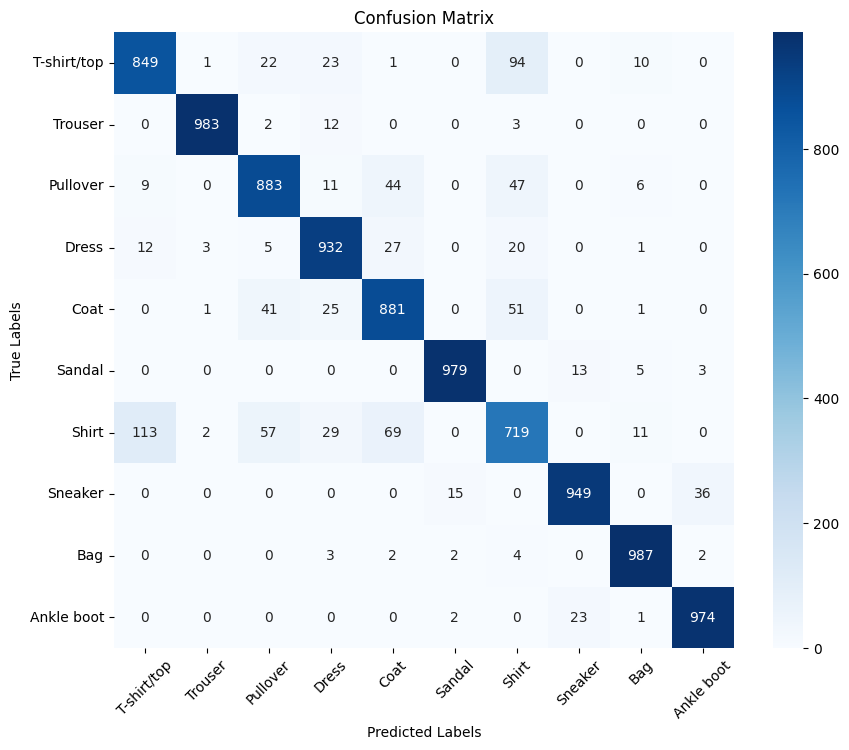

In [34]:
# Calculate the confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred_adam)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=45)
plt.yticks(rotation=0)   
plt.title("Confusion Matrix")
plt.show()

## In conclusion
### Different optimizers impact how the model learns from data. Adam performed best, likely due to its efficient adaptation of learning rates.
### Furthermore, utilizing the entire dataset for tuning enhances model performance on unseen data compared to using only a portion of the data. This ensures more comprehensive learning and generalization.